import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as mtpl
import seaborn as sns

read data

In [2]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

## Checking the null values

In [5]:
null_values = data.isnull().sum()
print(null_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Checking all the columns present in the given data

In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Finding average score

In [7]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Average score is decimal data so rounding it with 2

---



In [8]:
data['average score'] = np.round(data['average score'], 2)

In [9]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


1.

In [10]:
#Save the data into Clean data folder
data.to_csv("/content/CleanData_Student_Performance2.csv")

**Pie Plot**


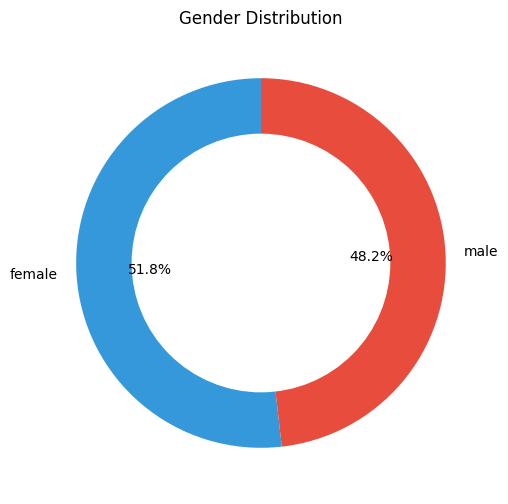

In [14]:
import matplotlib.pyplot as plt

# Assuming 'gender_count' is already calculated as shown before
# gender_count = data['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=["#3498db", "#e74c3c"])
plt.title('Gender Distribution')

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig('/content/results/gender_distribution_donut.jpg')
plt.show()

<ipython-input-15-74870400f09c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violinplot = sns.violinplot(x='gender', y='reading score', data=data,


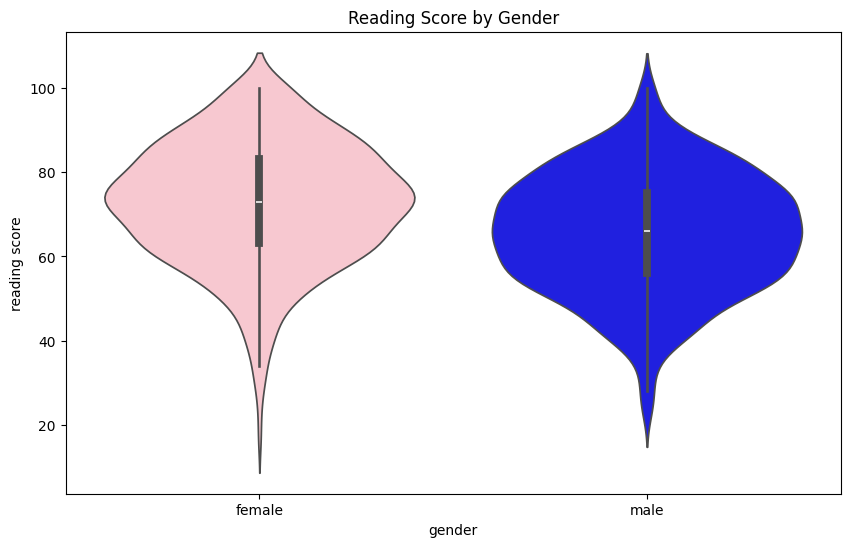

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Create the violin plot with specific colors for male and female
violinplot = sns.violinplot(x='gender', y='reading score', data=data,
                            palette={"male": "blue", "female": "pink"})  # Customize colors here

plt.title('Reading Score by Gender')

# To save the figure
plt.savefig('/content/results/Reading_score_by_gender_violin.jpg')
plt.show()

**Race Plot**

In [16]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [17]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

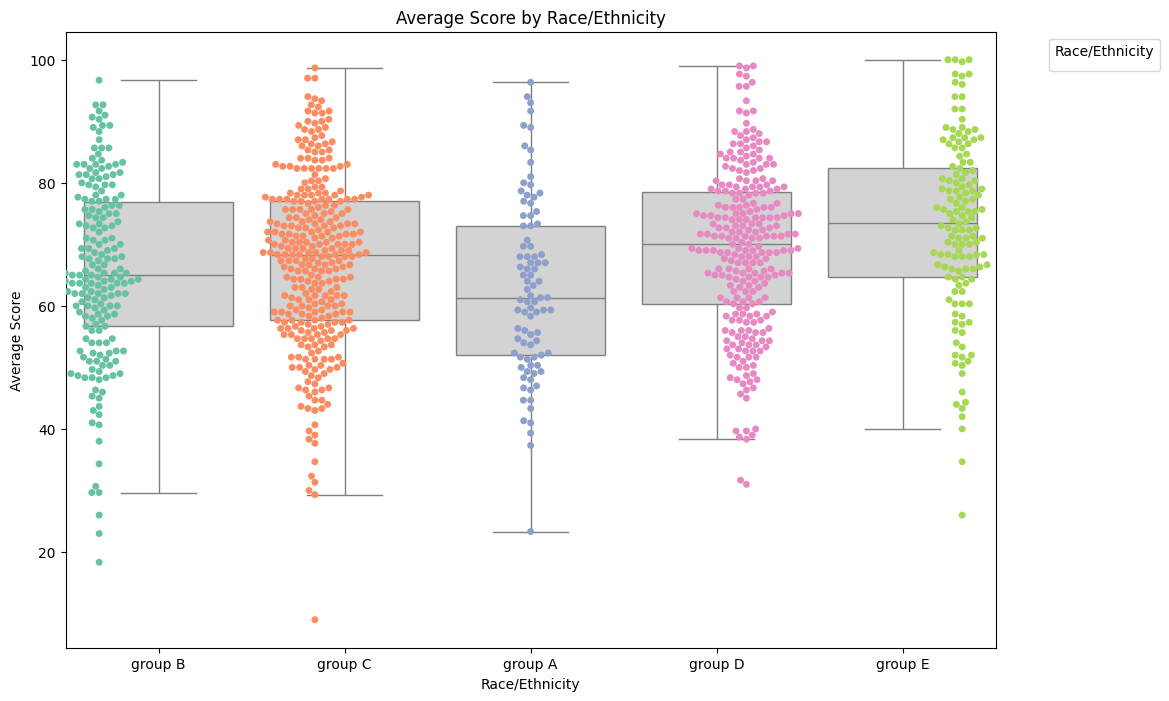

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Create a box plot to show summary statistics
sns.boxplot(data=data, x='race/ethnicity', y='average score', color='lightgrey', showfliers=False)
# Overlay a swarm plot to show the distribution of scores
swarmplot = sns.swarmplot(data=data, x='race/ethnicity', y='average score', hue='race/ethnicity', dodge=True, palette='Set2')

plt.title('Average Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the figure to save correctly
figure = swarmplot.get_figure()
figure.savefig('/content/results/race_average_score_combined.jpg')
plt.show()

**Create a scatter plot comparing Average Score with Math, Writing, and Reading Scores**

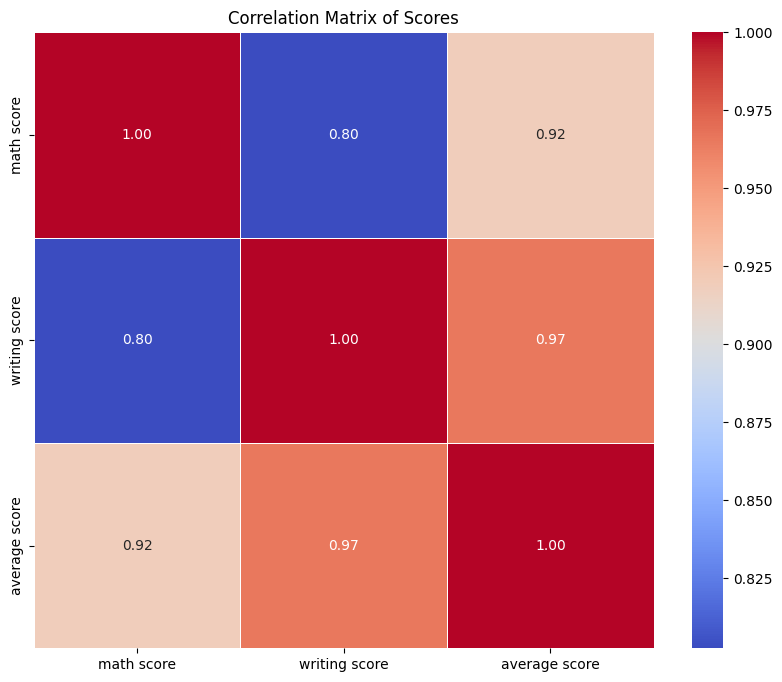

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
corr = data[['math score', 'writing score', 'average score']].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Scores')

# Adjusting the file save path to work in this environment
plt.savefig('/content/results/Scores_Correlation_Matrix.jpg')
plt.show()

<ipython-input-24-8368063f1c81>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='average score', data=data, palette=['#e74c3c', '#2ecc71'])  # Red and green colors


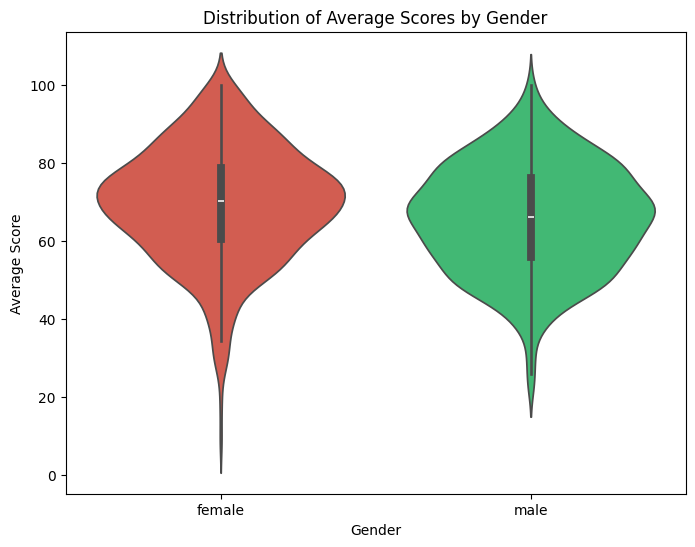

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Using a violin plot to display the distribution of average scores by gender
sns.violinplot(x='gender', y='average score', data=data, palette=['#e74c3c', '#2ecc71'])  # Red and green colors
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

# Save the figure
plt.savefig('/content/results/ave_score_by_gender_violinplot.jpg')
plt.show()